<a href="https://colab.research.google.com/github/johnsDevassy/Worked_Projects/blob/master/Twitter_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tweepy
import sys,tweepy
import pandas as pd

In [4]:
apikey="V75GOhK6KVSbtJJE0r2IXBcHx"
apikeysec="akwFwthwrhESPStgZ7CCAndPxXSIU5nIkbkMPsQL1HHS777nYw"
api_token="AAAAAAAAAAAAAAAAAAAAAMdkHwEAAAAAm%2B9cWlQxyeuQeDAfaflLvg1tfO4%3DzTunnYo7QCZ0ehVWq8rEeS8TmcJsAvZn1z6gbnn5dlhzobgYmi"
beart="AAAAAAAAAAAAAAAAAAAAAMdkHwEAAAAAf5TpRN8A6uNS195wM9XexiXDQ90%3DtcCI6H0uTC7FjydZ3ETNscUT7B1J15po2EUYKu4Jl5c75T5l0i"
accesstoken="1303588439208722432-SZ3MJnyz7YYcG1sT8C3KlYwr6iYhRI"
accesstokensec="XhkWhhsT8KEGmPHWro87lwv620K1hH0Evu5qZkySEBW4F"

In [5]:
def getauth():
  auth=tweepy.OAuthHandler(apikey,apikeysec)
  auth.set_access_token(accesstoken,accesstokensec)
  return auth
  

In [24]:
import re

text = u'...and where ever I go, food always makes me happy🥰🤩❤️'
print(text) # with emoji

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

print(deEmojify(text))

...and where ever I go, food always makes me happy🥰🤩❤️
...and where ever I go, food always makes me happy🥰🤩❤️


In [73]:
auth=getauth()
client=tweepy.API(auth,wait_on_rate_limit = True)

df = pd.DataFrame(columns=['text'])
msgs = []
msg =[]

In [74]:
for tweet in tweepy.Cursor(client.search,q='#oneplusnord -filter:retweets',rpp=100,lang='en').items(1000):
  if not tweet.retweeted and ( "RT @" not in tweet.text):
    msg = tweet.text
    msgs.append(msg)

In [75]:
TotalTweets=msgs
len(TotalTweets)

297

In [76]:
TotalTweets

['@OnePlus_IN \nHey there! I am user of OnePlus NORD device since September 2020 you have been rolled out many updates… https://t.co/WKPEeAnWS3',
 "@OnePlus_UK trying to get a new screen protector for Nord and you don't supply it for UK and irish customers?? Why… https://t.co/5GXmiqZHmm",
 '#oneplus launcher or #novalauncher ? @OnePlus \n#OnePlusnord',
 'Night shoot #shotononeplus #OnePlusNord @OnePlus_IN #NaturePhotography    full moon https://t.co/NwQPOxXQdM',
 'Hi, looking for #OnePlusNord reviews \nHas anyone used this one?',
 'View 🖤 #shotononeplus  #OneplusNord @OnePlus_IN #MumbaiT2InternationalAirport #NightscapeMode https://t.co/UcUjzVO2uW',
 '@oneplus @OnePlus_IN Thank you for Nightscape!\n#shotononeplus #OnePlusNord https://t.co/wezsz5kTJL',
 'Although I know you "Never Settle" but is there any way we can Settle this because I am not able to say No to No-Rd… https://t.co/9kQ0cVoqdT',
 'This cricket season, love the sport and the medium! Shop at your nearest Croma store or vis

In [77]:
import re

def removepun_emo_nl(twee):
  twee  = re.sub(r"http\S+", "", twee)
  twee.replace('\n','')
  newt=''
  samp='aAbBcCdDeEfFgGhHiIjJkKlLmMnNoOpPqQrRsStTuUvVwWxXyYzZ '
  for char in twee:
    if char in samp:
      newt+=char
  return newt

In [78]:
for i in range(len(TotalTweets)):
  TotalTweets[i]=removepun_emo_nl(TotalTweets[i])


In [79]:
TotalTweets

['OnePlusIN Hey there I am user of OnePlus NORD device since September  you have been rolled out many updates ',
 'OnePlusUK trying to get a new screen protector for Nord and you dont supply it for UK and irish customers Why ',
 'oneplus launcher or novalauncher  OnePlus OnePlusnord',
 'Night shoot shotononeplus OnePlusNord OnePlusIN NaturePhotography    full moon ',
 'Hi looking for OnePlusNord reviews Has anyone used this one',
 'View  shotononeplus  OneplusNord OnePlusIN MumbaiTInternationalAirport NightscapeMode ',
 'oneplus OnePlusIN Thank you for Nightscapeshotononeplus OnePlusNord ',
 'Although I know you Never Settle but is there any way we can Settle this because I am not able to say No to NoRd ',
 'This cricket season love the sport and the medium Shop at your nearest Croma store or visit ',
 'This cricket season love the sport and the medium Shop at your nearest Croma store or visit ',
 'just leaving it here OnePlusReferral NeverSettle OnePlusT OnePlusNord OnePlus OnePlusPro

In [80]:
texttweets=[t for t in TotalTweets]

In [81]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
tokenized=[word_tokenize(t) for t in texttweets]
tokenized[0]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['OnePlusIN',
 'Hey',
 'there',
 'I',
 'am',
 'user',
 'of',
 'OnePlus',
 'NORD',
 'device',
 'since',
 'September',
 'you',
 'have',
 'been',
 'rolled',
 'out',
 'many',
 'updates']

In [82]:
tokenized[1]

['OnePlusUK',
 'trying',
 'to',
 'get',
 'a',
 'new',
 'screen',
 'protector',
 'for',
 'Nord',
 'and',
 'you',
 'dont',
 'supply',
 'it',
 'for',
 'UK',
 'and',
 'irish',
 'customers',
 'Why']

In [83]:
tokenized[2]

['oneplus', 'launcher', 'or', 'novalauncher', 'OnePlus', 'OnePlusnord']

In [84]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation
cars='εδώΔίτουπαρουσίασηΩμ!"#$%&\'*+,/:;<=>?@[\\]^_`{|}~'
def preprocess(texts):
  sp_words=set(stopwords.words('english'))
  def remove_punctuation(tokens):
    return [token.lower() for token in tokens if token.lower() not in sp_words and token.lower() not in punctuation ]
  return [remove_punctuation(text) for text in texts]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [85]:
preprocessed=preprocess(tokenized)
sp_words=set(stopwords.words('english'))
# print(sp_words)
def remove_punctuation(tokens):
    return [token.lower() for token in tokens if token not in sp_words and token not in punctuation ]
k="I have a problem on this question I should've . .. ... # what are this is a problem ok bye i don't know ll "
re=remove_punctuation(word_tokenize(k))
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [86]:
preprocessed[74]

['oneplussupport',
 'oneplus',
 'fraud',
 'company',
 'pleasy',
 'dont',
 'buy',
 'cheaters',
 'oneplusnord',
 'oneplus',
 'oneplusin',
 'petelau',
 'vikasagl']

In [87]:
# stopwords.words('english')

In [88]:
#goodthing done till now. Remove links . Regular expressions. buut first lemmatize I guess


In [89]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import wordnet
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [90]:
from nltk.stem import WordNetLemmatizer
lemmatizer =WordNetLemmatizer()
def lem(tw):
  return [lemmatizer.lemmatize(t,get_wordnet_pos(t)) for t in tw]
lemmatized =[lem(twee) for twee in preprocessed] 

In [91]:
#niceaayt pani paliya lemmetizer
# print(lemmatizer.lemmatize('studying',get_wordnet_pos('studying'))
# lemmatized.remove('nord')
# lemmatized.remove('plus')
# lemmatized.remove('one')
# lemmatized.remove('oneplus')
# lemmatized.remove('oneplusnord')
lemmatized[74]

['oneplussupport',
 'oneplus',
 'fraud',
 'company',
 'pleasy',
 'dont',
 'buy',
 'cheater',
 'oneplusnord',
 'oneplus',
 'oneplusin',
 'petelau',
 'vikasagl']

In [92]:
list1=['nord','oneplus','http','one','oneplusbuds','oneplusnord','...',"'s",'’','plus','phone','de','also','galaxy','price','oneplus_in',"n't",'lenovo','playapex','x','philippine','un','amp','youtube','que']

In [93]:
from collections import Counter 
flatList = [w for subList in lemmatized for w in subList]
print(flatList[0:20])
flatList=[s for s in flatList if s not in list1]
# for w in most_occur:
#   flatList.remove(w)
# counter = Counter(flatList) 
# most_occur = counter.most_common(20) 
print(flatList[0:20])

['oneplusin', 'hey', 'user', 'oneplus', 'nord', 'device', 'since', 'september', 'roll', 'many', 'update', 'oneplusuk', 'try', 'get', 'new', 'screen', 'protector', 'nord', 'dont', 'supply']
['oneplusin', 'hey', 'user', 'device', 'since', 'september', 'roll', 'many', 'update', 'oneplusuk', 'try', 'get', 'new', 'screen', 'protector', 'dont', 'supply', 'uk', 'irish', 'customer']


In [94]:
counter = Counter(flatList) 
most_occur = counter.most_common(20) 
print(most_occur)

[('oneplusin', 55), ('new', 33), ('g', 32), ('gb', 32), ('update', 22), ('launch', 22), ('come', 21), ('smartphone', 20), ('v', 18), ('get', 15), ('series', 14), ('shotononeplus', 13), ('camera', 13), ('ram', 13), ('n', 13), ('soop', 13), ('amazon', 12), ('soon', 12), ('love', 11), ('r', 11)]


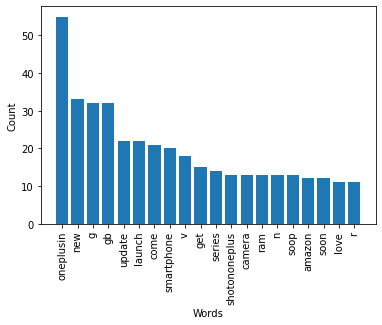

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
x,y = zip(*most_occur)
plt.bar(x,y)
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.draw()

[(('gb', 'ram'), 13), (('come', 'soon'), 8), (('new', 'smartphone'), 8), (('gb', 'gb'), 7), (('n', 'g'), 7), (('ram', 'gb'), 6), (('oneplusin', 'oneplussupport'), 6), (('shotononeplus', 'oneplusin'), 5), (('camera', 'comparison'), 5), (('tease', 'new'), 5), (('go', 'sale'), 5), (('oneplusin', 'naturephotography'), 4), (('samsung', 'v'), 4), (('security', 'update'), 4), (('september', 'security'), 4), (('new', 'update'), 4), (('smartphone', 'come'), 4), (('sale', 'today'), 4), (('today', 'pm'), 4), (('come', 'mp'), 3)]
dict_values([13, 8, 8, 7, 7, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3])


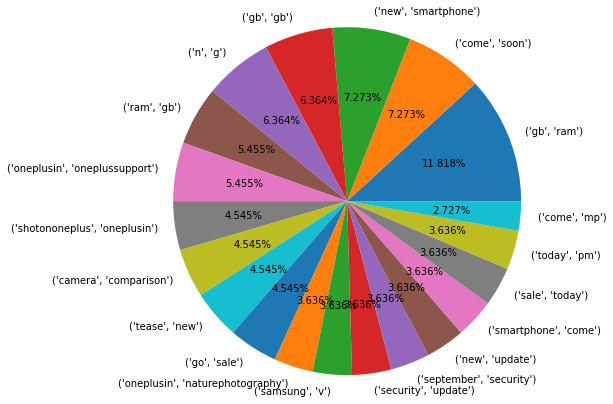

In [96]:
from nltk.util import ngrams 
n_grams = 2
x = dict(Counter(ngrams(flatList, n_grams)))
print(sorted(x.items(), key = lambda item:item[1], reverse=True)[:20])
y = {k:x[k] for (k,v) in sorted(x.items(), key = lambda item:item[1], reverse=True)[:20]}
print(y.values())
plt.pie(y.values(), labels = y.keys(), radius = 2,autopct='%1.3f%%')
plt.show()